
# Prediction Of Heart Disease Using Ensemble<br>Learning & Ant Colony Optimization

### 1. Importing Libraries
Importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import random
import math
import time
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from scipy import spatial
from scipy.spatial.distance import cosine
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

### 2. Loading Dataset
Loading the required Dataset as Dataframe.

In [2]:
data1 = pd.read_csv("heart project.csv")
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### 3. Data Cleaning and Preprocessing
Replacing the column names of the dataset with their actual names.<br>
Converting the numeric features to categorical features.

In [3]:
data1.columns = ['age','sex','chest pain type','resting blood pressure',
                 'cholesterol','fasting blood sugar','rest ecg',
                 'max heart rate achieved','exercise induced angina','oldpeak',
                 'st slope','no. of vessels colored','thalassemia','target']
data1['chest pain type'][data1['chest pain type'] == 0] = 'typical angina'
data1['chest pain type'][data1['chest pain type'] == 1] = 'atypical angina'
data1['chest pain type'][data1['chest pain type'] == 2] = 'non-anginal pain'
data1['chest pain type'][data1['chest pain type'] == 3] = 'asymptomatic'

data1['rest ecg'][data1['rest ecg'] == 0] = 'normal'
data1['rest ecg'][data1['rest ecg'] == 1] = 'ST-T wave abnormality'
data1['rest ecg'][data1['rest ecg'] == 2] = 'left ventricular hypertrophy'

data1['st slope'][data1['st slope'] == 0] = 'normal'
data1['st slope'][data1['st slope'] == 1] = 'upsloping'
data1['st slope'][data1['st slope'] == 2] = 'flat'
data1['st slope'][data1['st slope'] == 3] = 'downsloping'

data1['thalassemia'][data1['thalassemia'] == 0] = 'no thalassemia'
data1['thalassemia'][data1['thalassemia'] == 1] = 'normal thalassemia'
data1['thalassemia'][data1['thalassemia'] == 2] = 'fixed defect thalassemia'
data1['thalassemia'][data1['thalassemia'] == 3] = 'reversible defect thalassemia'

data1['fasting blood sugar'][data1['fasting blood sugar'] == 0] = 'Fasting Blood Sugar <= 120'
data1['fasting blood sugar'][data1['fasting blood sugar'] == 1] = 'Fasting Blood Sugar > 120'

data1['exercise induced angina'][data1['exercise induced angina'] == 0] = 'no exercise induced angina'
data1['exercise induced angina'][data1['exercise induced angina'] == 1] = 'exercise induced angina'

data1['target'][data1['target'] == 0] = 'healthy'
data1['target'][data1['target'] == 1] = 'heart disease'

data1['sex'][data1['sex'] == 0] = 'female'
data1['sex'][data1['sex'] == 1] = 'male'

data1

,age,sex,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,rest ecg,max heart rate achieved,exercise induced angina,oldpeak,st slope,no. of vessels colored,thalassemia,target
0,52,male,typical angina,125,212,Fasting Blood Sugar <= 120,ST-T wave abnormality,168,no exercise induced angina,1.0,flat,2,reversible defect thalassemia,healthy
1,53,male,typical angina,140,203,Fasting Blood Sugar > 120,normal,155,exercise induced angina,3.1,normal,0,reversible defect thalassemia,healthy
2,70,male,typical angina,145,174,Fasting Blood Sugar <= 120,ST-T wave abnormality,125,exercise induced angina,2.6,normal,0,reversible defect thalassemia,healthy
3,61,male,typical angina,148,203,Fasting Blood Sugar <= 120,ST-T wave abnormality,161,no exercise induced angina,0.0,flat,1,reversible defect thalassemia,healthy
4,62,female,typical angina,138,294,Fasting Blood Sugar > 120,ST-T wave abnormality,106,no exercise induced angina,1.9,upsloping,3,fixed defect thalassemia,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,atypical angina,140,221,Fasting Blood Sugar <= 120,ST-T wave abnormality,164,exercise induced angina,0.0,flat,0,fixed defect thalassemia,heart disease
1021,60,male,typical angina,125,258,Fasting Blood Sugar <= 120,normal,141,exercise induced angina,2.8,upsloping,1,reversible defect thalassemia,healthy
1022,47,male,typical angina,110,275,Fasting Blood Sugar <= 120,normal,118,exercise induced angina,1.0,upsloping,1,fixed defect thalassemia,healthy
1023,50,female,typical angina,110,254,Fasting Blood Sugar <= 120,normal,159,no exercise induced angina,0.0,flat,0,fixed defect thalassemia,heart disease


Checking missing entries in the dataset columnwise.

In [4]:
data1.isna().sum()

age                        0
sex                        0
chest pain type            0
resting blood pressure     0
cholesterol                0
fasting blood sugar        0
rest ecg                   0
max heart rate achieved    0
exercise induced angina    0
oldpeak                    0
st slope                   0
no. of vessels colored     0
thalassemia                0
target                     0
dtype: int64

#### This concludes that the dataset has no null values

Describing numeric features of the dataset.

In [5]:
data1.describe(include =[np.number])

,age,resting blood pressure,cholesterol,max heart rate achieved,oldpeak,no. of vessels colored
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


Describing categorical features of the dataset.

In [6]:
data1.describe(include =[np.object])

,sex,chest pain type,fasting blood sugar,rest ecg,exercise induced angina,st slope,thalassemia,target
count,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,4,2
top,male,typical angina,Fasting Blood Sugar <= 120,ST-T wave abnormality,no exercise induced angina,upsloping,fixed defect thalassemia,heart disease
freq,713,497,872,513,680,482,544,526


### 4. Data Visualization
Plotting Pie Chart and Count plot for Target feature.

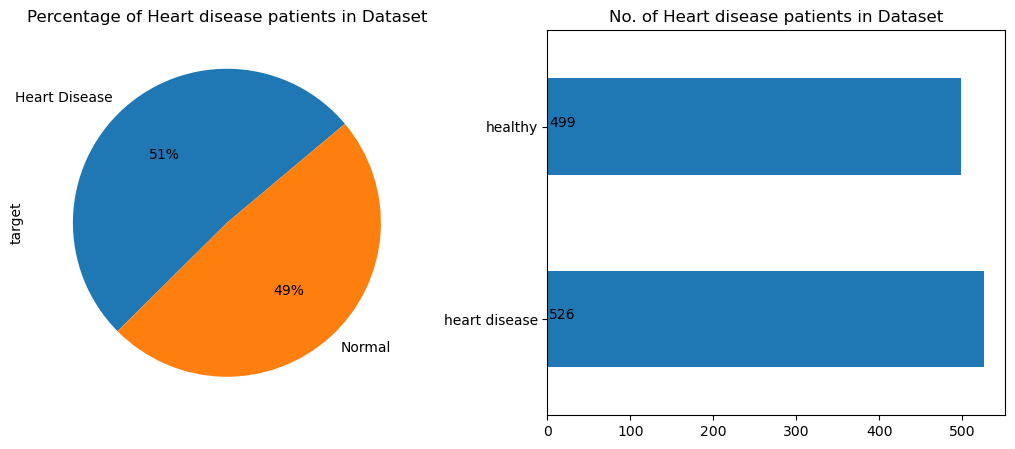

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
ax1 = data1['target'].value_counts().plot.pie(x="Heart disease", y='no.of patients',autopct="%1.0f%%",
                                              labels=["Heart Disease","Normal"], startangle = 40,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = data1["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(data1["target"].value_counts().values):
    ax2.text(2,i,j,fontsize=10)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

Plotting Pie Chart and Distribution plot for features Gender and Age respectively.

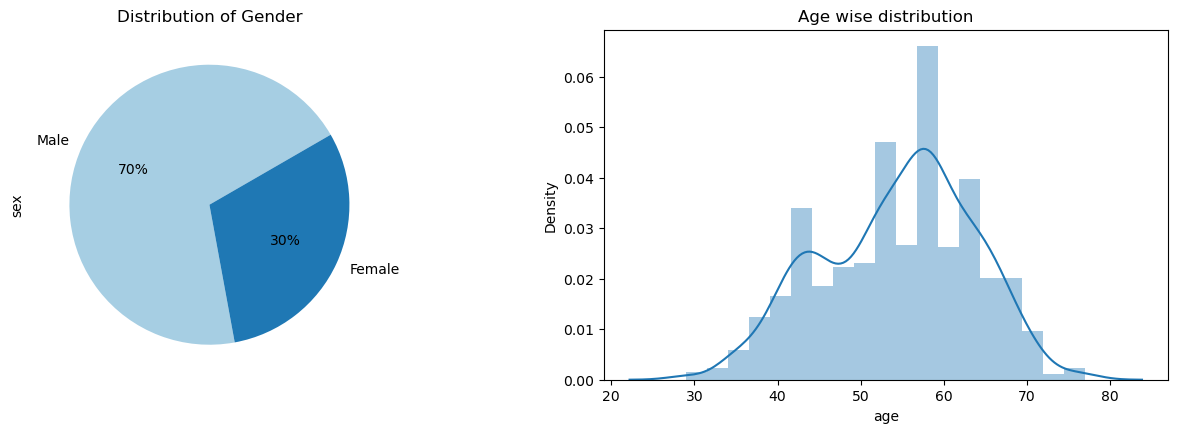

In [8]:
plt.figure(figsize=(16,10))
plt.subplot(221)
data1["sex"].value_counts().plot.pie(autopct = "%1.0f%%", colors = sns.color_palette("Paired"),
                                     startangle = 30, labels=["Male","Female"],)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(data1['age'])
plt.title("Age wise distribution")
plt.show()

Plotting Age Distribution Plot for normal and heart disease patients.<br>
Plotting Gender Bar Chart for normal and heart disease patients.

ValueError: could not convert string to float: 'male'

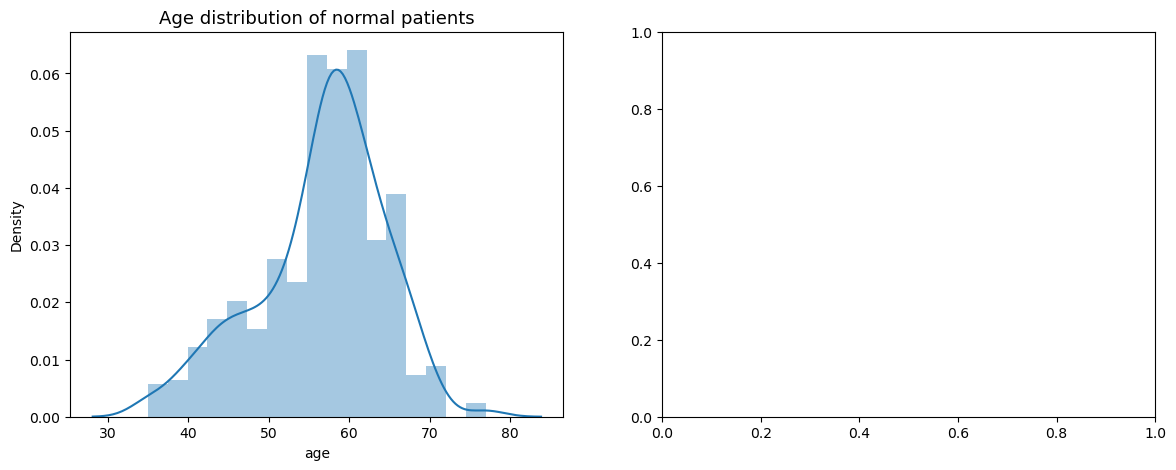

In [10]:
t0=data1[data1['target']=="healthy"]
t1=data1[data1['target']=="heart disease"]

fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(t0['age'])
plt.title('Age distribution of normal patients',fontsize=13)

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(t0['sex'],palette="Paired")
plt.title('Gender distribution of normal patients',fontsize=13)
plt.show()

fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(t1['age'])
plt.title('Age distribution of heart disease patients',fontsize=13)

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(t1['sex'],palette="Paired")
plt.title('Gender distribution of heart disease patients',fontsize=13)
plt.show()

Plotting Count Plot for Chest Pain Type Feature.

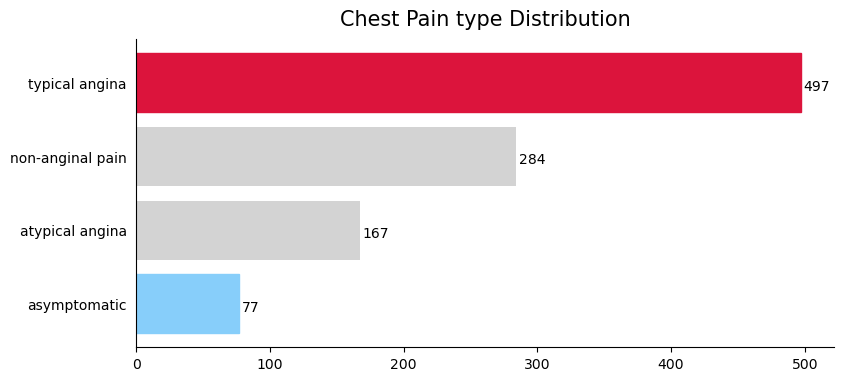

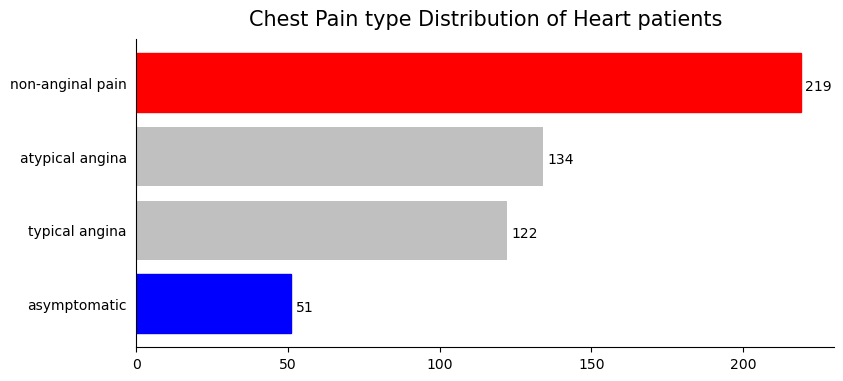

In [11]:
fig, ax = plt.subplots(figsize=(9,4))

cpt=data1['chest pain type'].value_counts().sort_values(ascending=False).reset_index()
pc= ax.barh(cpt.iloc[:,0], cpt.iloc[:,1], color='lightgray')
pc[0].set_color('crimson')
pc[3].set_color('lightskyblue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('Chest Pain type Distribution',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

fig, ax = plt.subplots(figsize=(9,4))

cpt1=t1['chest pain type'].value_counts().sort_values(ascending=False).reset_index()
pc1= ax.barh(cpt1.iloc[:,0], cpt1.iloc[:,1], color='silver')
pc1[0].set_color('red')
pc1[3].set_color('blue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('Chest Pain type Distribution of Heart patients',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+1.5, i.get_y()+0.5, str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

Plotting Count Plot for Fasting Blood Sugar Feature.

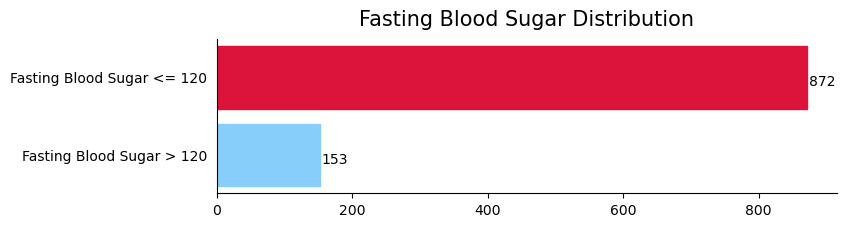

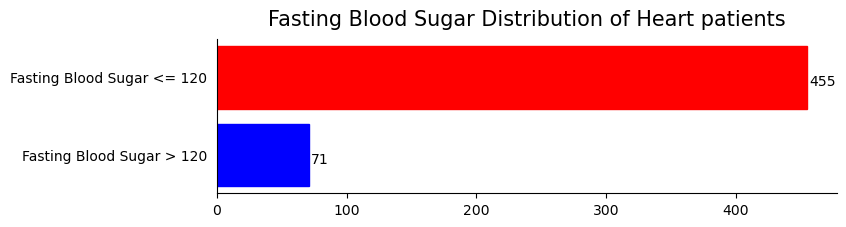

In [12]:
fig, ax = plt.subplots(figsize=(8,2))

cpt=data1['fasting blood sugar'].value_counts().sort_values(ascending=False).reset_index()
pc= ax.barh(cpt.iloc[:,0], cpt.iloc[:,1], color='lightgray')
pc[0].set_color('crimson')
pc[1].set_color('lightskyblue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('Fasting Blood Sugar Distribution',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

fig, ax = plt.subplots(figsize=(8,2))

cpt1=t1['fasting blood sugar'].value_counts().sort_values(ascending=False).reset_index()
pc1= ax.barh(cpt1.iloc[:,0], cpt1.iloc[:,1], color='silver')
pc1[0].set_color('red')
pc1[1].set_color('blue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.set_ticks_position('none') 
ax.invert_yaxis()

ax.set_title('Fasting Blood Sugar Distribution of Heart patients',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+1.5, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

Plotting Count Plot for Rest ECG Feature.

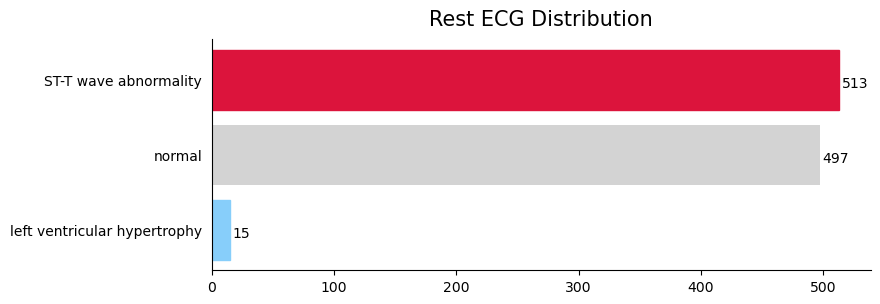

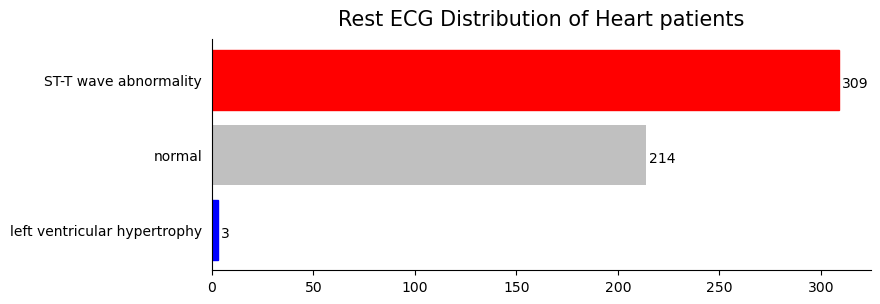

In [13]:
fig, ax = plt.subplots(figsize=(8.5,3))

cpt=data1['rest ecg'].value_counts().sort_values(ascending=False).reset_index()
pc= ax.barh(cpt.iloc[:,0], cpt.iloc[:,1], color='lightgray')
pc[0].set_color('crimson')
pc[2].set_color('lightskyblue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('Rest ECG Distribution',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()


fig, ax = plt.subplots(figsize=(8.5,3))

cpt1=t1['rest ecg'].value_counts().sort_values(ascending=False).reset_index()
pc1= ax.barh(cpt1.iloc[:,0], cpt1.iloc[:,1], color='silver')
pc1[0].set_color('red')
pc1[2].set_color('blue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('Rest ECG Distribution of Heart patients',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+1.5, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

Plotting Count Plot for Exercise Induced Angina Feature.

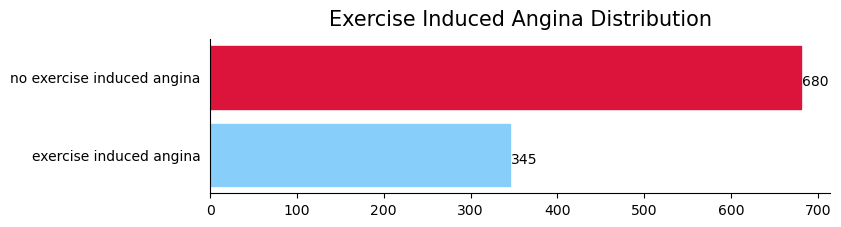

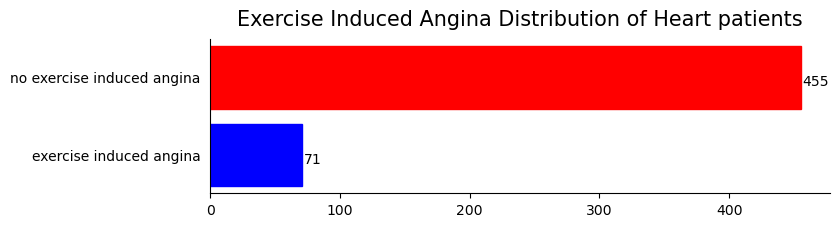

In [14]:
fig, ax = plt.subplots(figsize=(8,2))

cpt=data1['exercise induced angina'].value_counts().sort_values(ascending=False).reset_index()
pc= ax.barh(cpt.iloc[:,0], cpt.iloc[:,1], color='lightgray')
pc[0].set_color('crimson')
pc[1].set_color('lightskyblue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('Exercise Induced Angina Distribution',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

fig, ax = plt.subplots(figsize=(8,2))

cpt1=t1['exercise induced angina'].value_counts().sort_values(ascending=False).reset_index()
pc1= ax.barh(cpt1.iloc[:,0], cpt1.iloc[:,1], color='silver')
pc1[0].set_color('red')
pc1[1].set_color('blue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.set_ticks_position('none') 
ax.invert_yaxis()

ax.set_title('Exercise Induced Angina Distribution of Heart patients',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+1.5, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

Plotting Count Plot for ST Slope Feature.

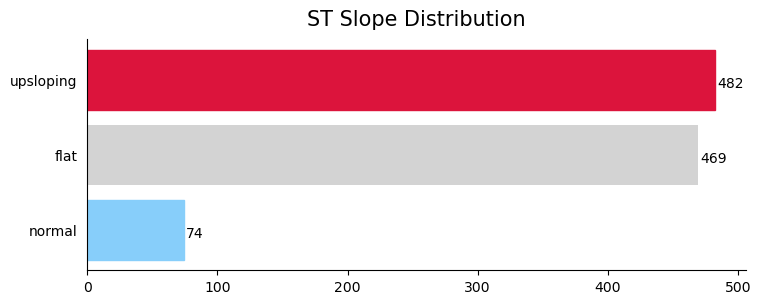

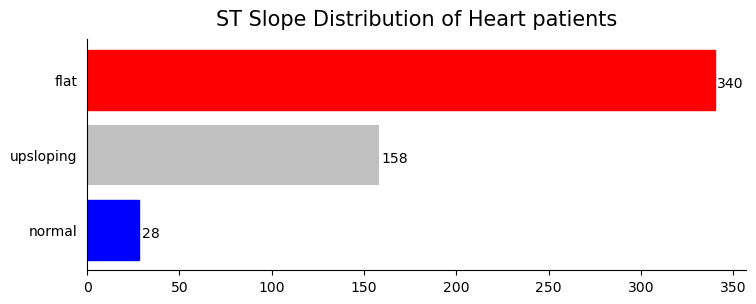

In [15]:
fig, ax = plt.subplots(figsize=(8.5,3))

cpt=data1['st slope'].value_counts().sort_values(ascending=False).reset_index()
pc= ax.barh(cpt.iloc[:,0], cpt.iloc[:,1], color='lightgray')
pc[0].set_color('crimson')
pc[2].set_color('lightskyblue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('ST Slope Distribution',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()


fig, ax = plt.subplots(figsize=(8.5,3))

cpt1=t1['st slope'].value_counts().sort_values(ascending=False).reset_index()
pc1= ax.barh(cpt1.iloc[:,0], cpt1.iloc[:,1], color='silver')
pc1[0].set_color('red')
pc1[2].set_color('blue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('ST Slope Distribution of Heart patients',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+1.5, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

Plotting Count Plot for Thalassemia Feature.

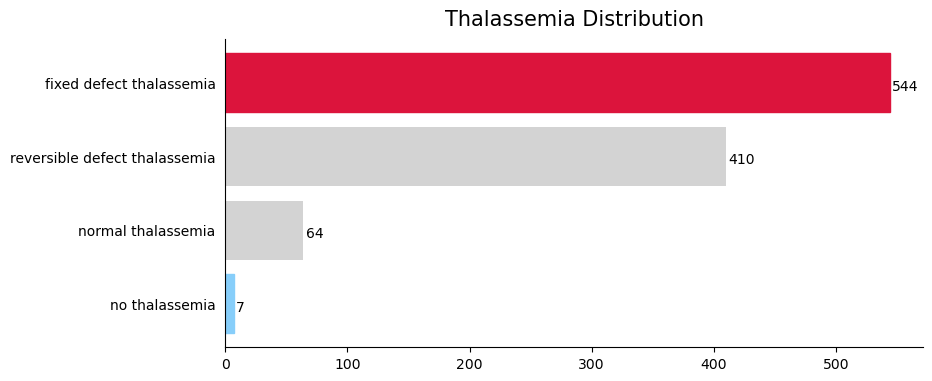

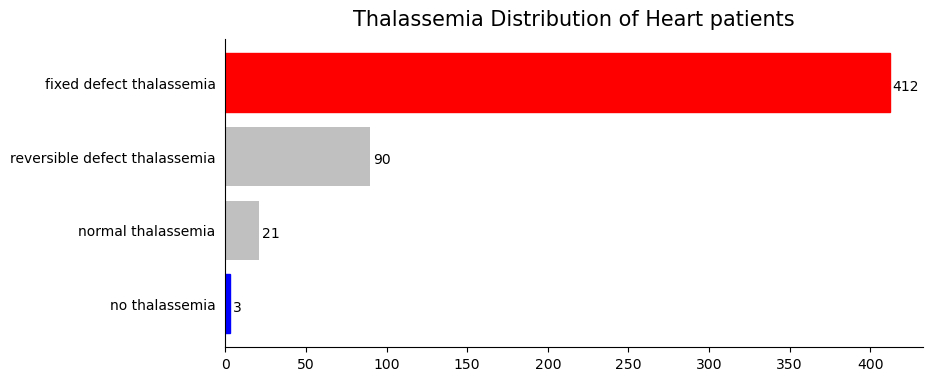

In [16]:
fig, ax = plt.subplots(figsize=(9,4))

cpt=data1['thalassemia'].value_counts().sort_values(ascending=False).reset_index()
pc= ax.barh(cpt.iloc[:,0], cpt.iloc[:,1], color='lightgray')
pc[0].set_color('crimson')
pc[3].set_color('lightskyblue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('Thalassemia Distribution',loc='center', pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

fig, ax = plt.subplots(figsize=(9,4))

cpt1=t1['thalassemia'].value_counts().sort_values(ascending=False).reset_index()
pc1= ax.barh(cpt1.iloc[:,0], cpt1.iloc[:,1], color='silver')
pc1[0].set_color('red')
pc1[3].set_color('blue')

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_title('Thalassemia Distribution of Heart patients',loc='center',pad=10, fontsize=15)
plt.yticks()

for i in ax.patches:
    ax.text(i.get_width()+1.5, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize=10)
plt.yticks()
plt.xticks()
plt.show()

Plotting Pairplot for numeric feature.

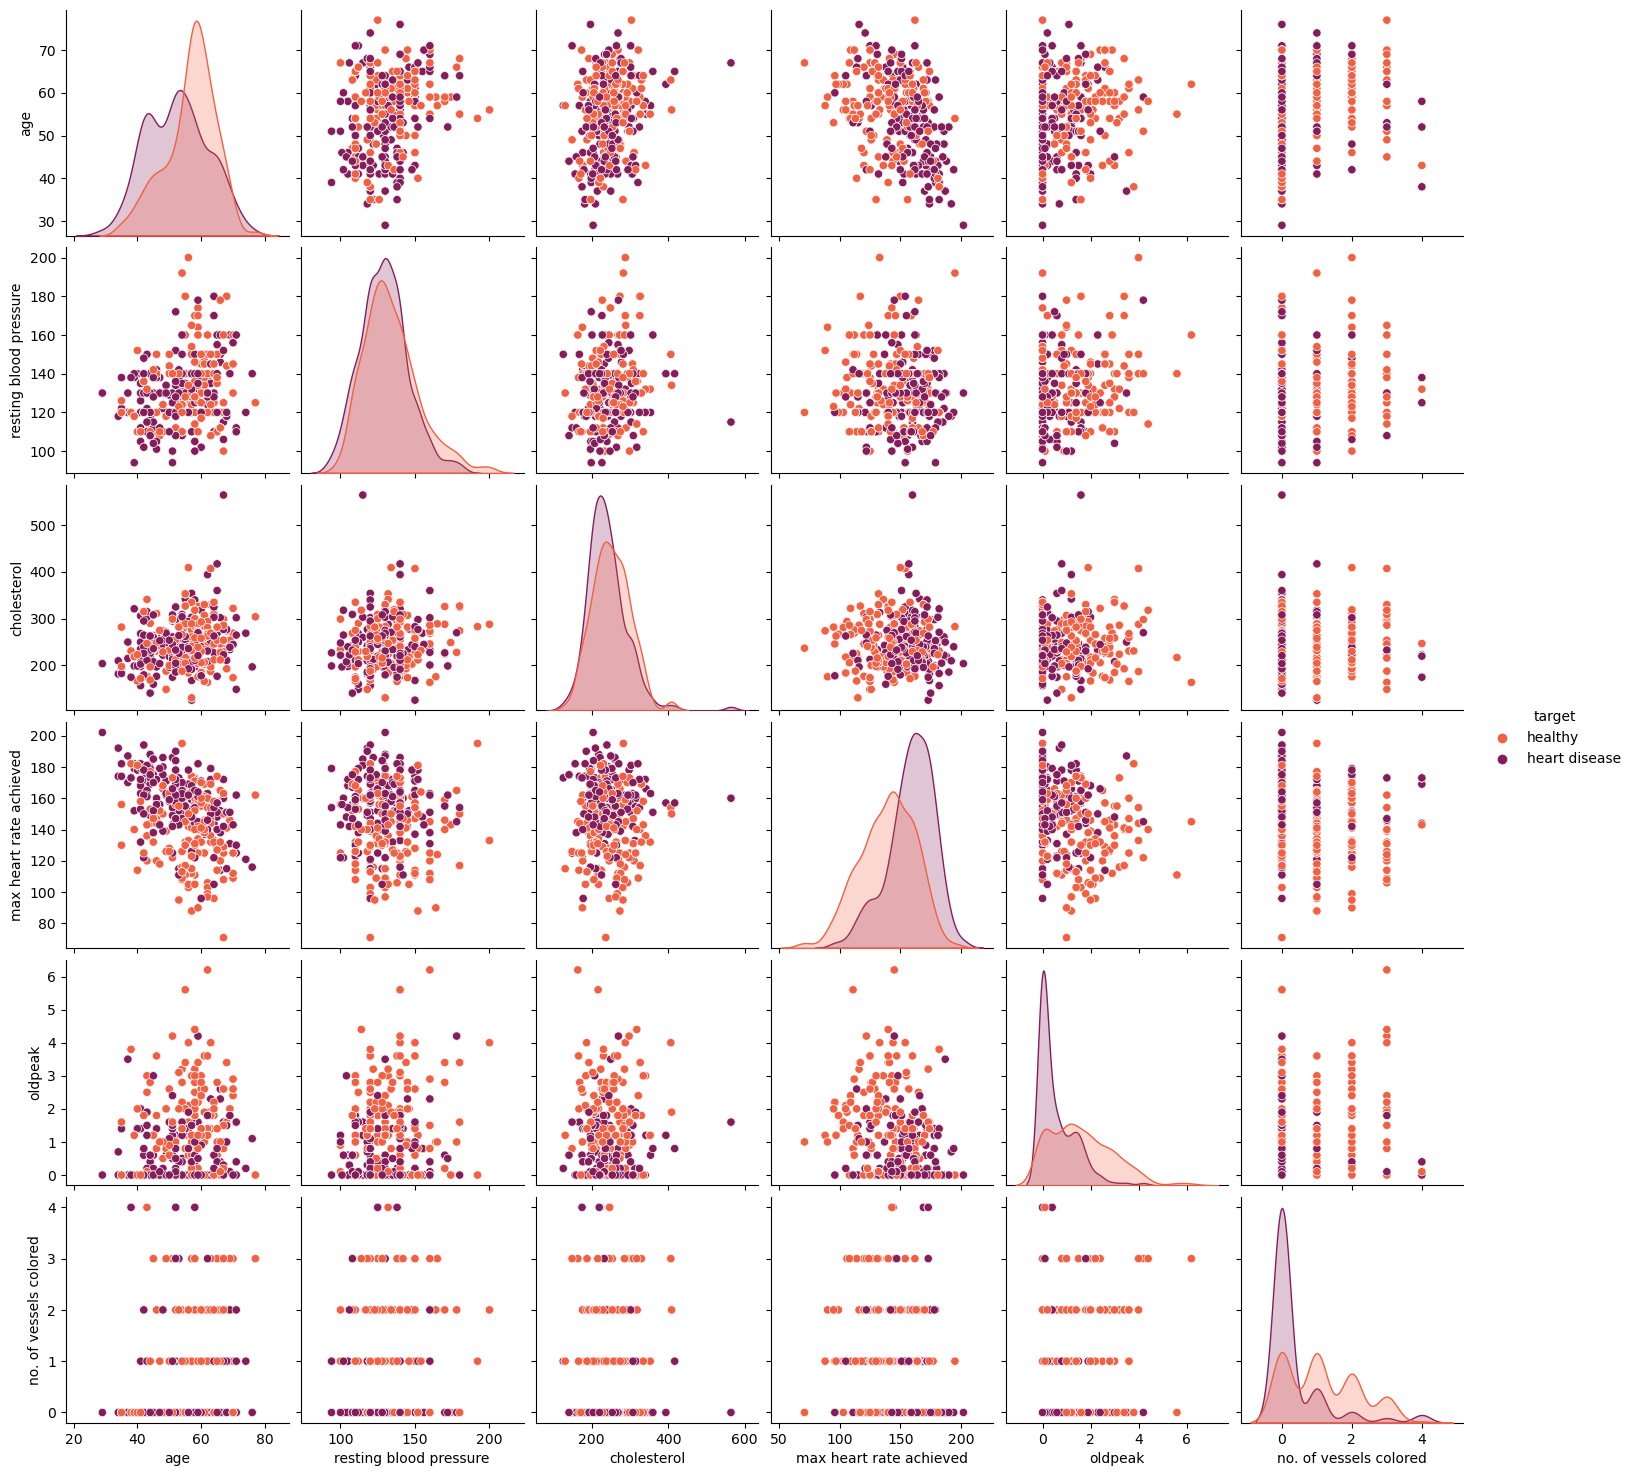

In [17]:
sns.pairplot(data1,hue='target',vars= ['age','resting blood pressure','cholesterol','max heart rate achieved',
                                       'oldpeak','no. of vessels colored'],palette="rocket_r" )
plt.show()

Plotting Histogram for Features.

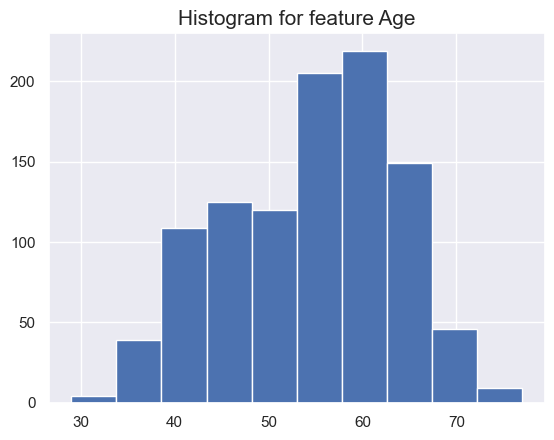

In [18]:
sns.set()
df = pd.read_csv("heart project.csv")
plt.hist(df["age"])
plt.title('Histogram for feature Age',fontsize=15)
plt.show()

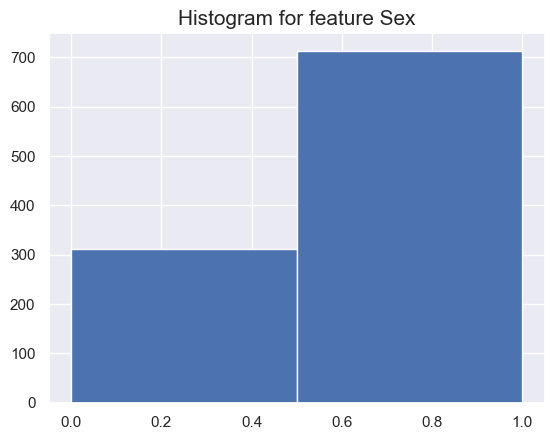

In [19]:
plt.hist(df["sex"],bins=2)
plt.title('Histogram for feature Sex',fontsize=15)
plt.show()

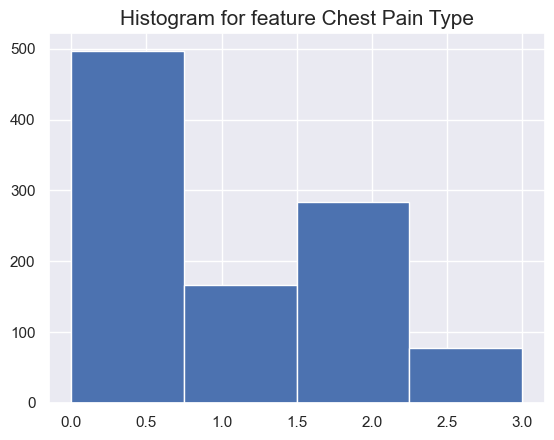

In [20]:
plt.hist(df["cp"],bins=4)
plt.title('Histogram for feature Chest Pain Type',fontsize=15)
plt.show()

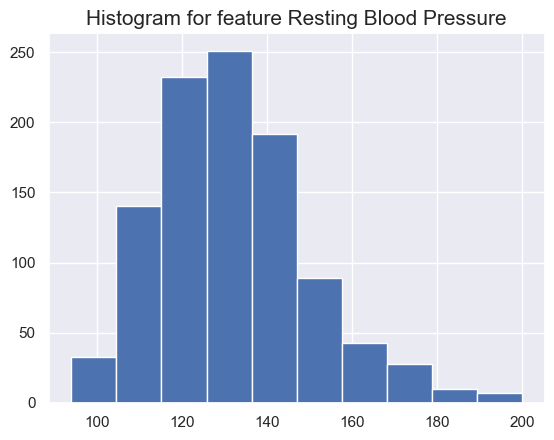

In [21]:
plt.hist(df["trestbps"])
plt.title('Histogram for feature Resting Blood Pressure',fontsize=15)
plt.show()

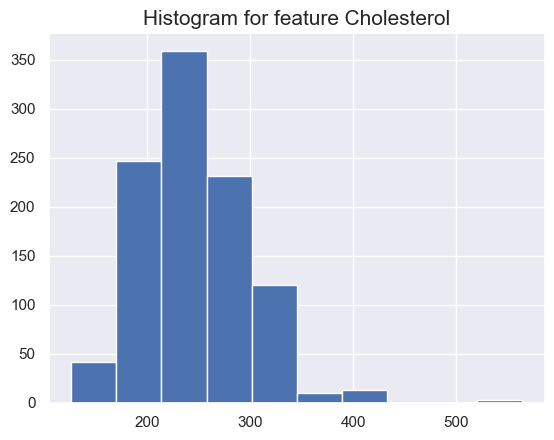

In [22]:
plt.hist(df["chol"])
plt.title('Histogram for feature Cholesterol',fontsize=15)
plt.show()

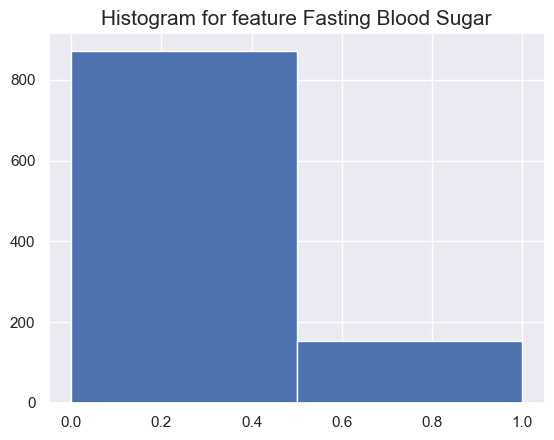

In [23]:
plt.hist(df["fbs"],bins=2)
plt.title('Histogram for feature Fasting Blood Sugar',fontsize=15)
plt.show()

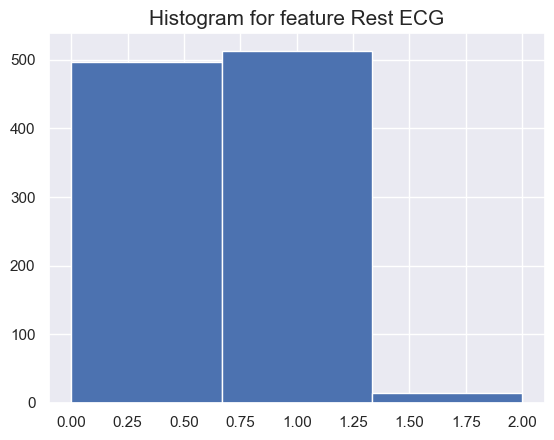

In [24]:
plt.hist(df["restecg"],bins=3)
plt.title('Histogram for feature Rest ECG',fontsize=15)
plt.show()

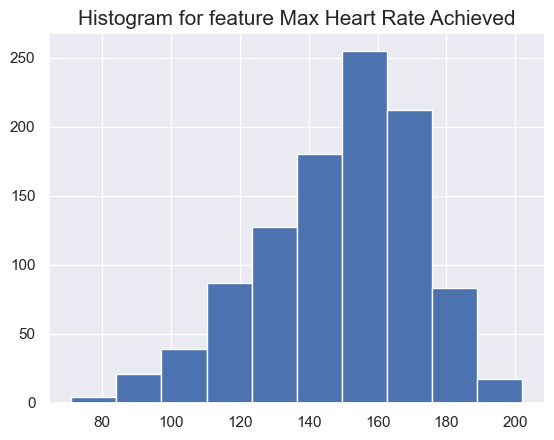

In [25]:
plt.hist(df["thalach"])
plt.title('Histogram for feature Max Heart Rate Achieved',fontsize=15)
plt.show()

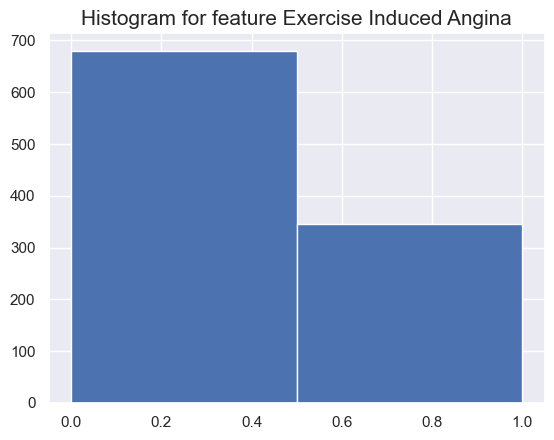

In [26]:
plt.hist(df["exang"],bins=2)
plt.title('Histogram for feature Exercise Induced Angina',fontsize=15)
plt.show()

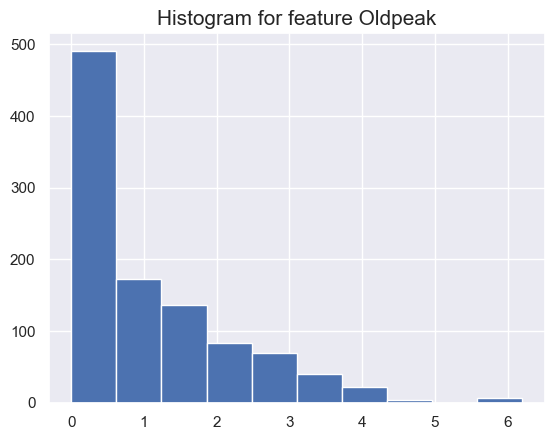

In [27]:
plt.hist(df["oldpeak"])
plt.title('Histogram for feature Oldpeak',fontsize=15)
plt.show()

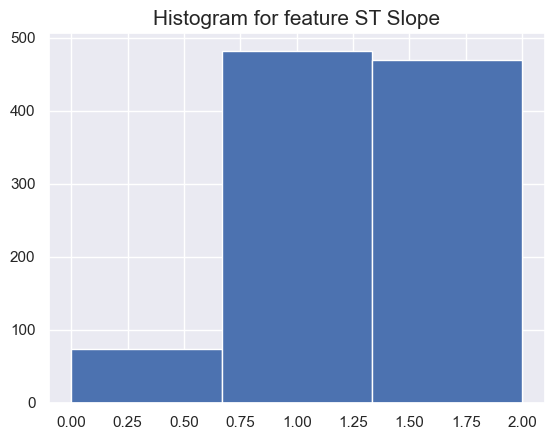

In [28]:
plt.hist(df["slope"],bins=3)
plt.title('Histogram for feature ST Slope',fontsize=15)
plt.show()

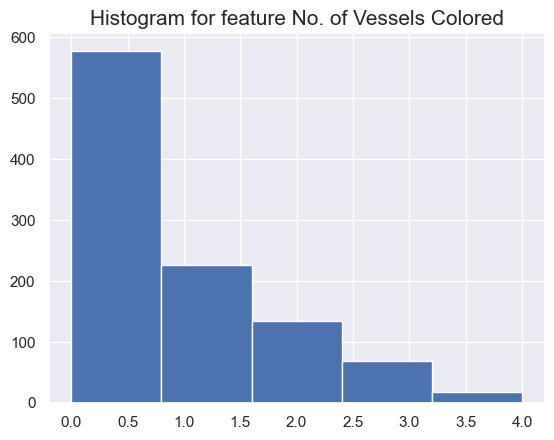

In [29]:
plt.hist(df["ca"],bins=5)
plt.title('Histogram for feature No. of Vessels Colored',fontsize=15)
plt.show()

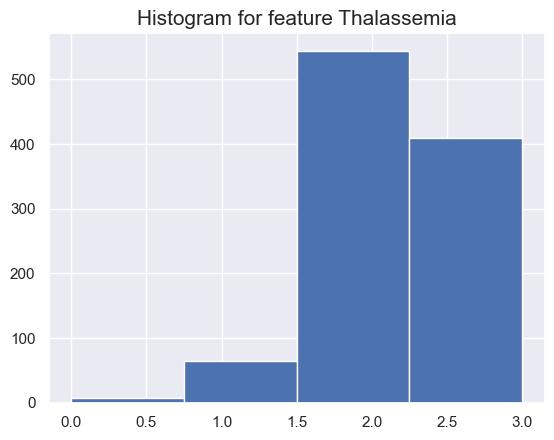

In [30]:
plt.hist(df["thal"],bins=4)
plt.title('Histogram for feature Thalassemia',fontsize=15)
plt.show()

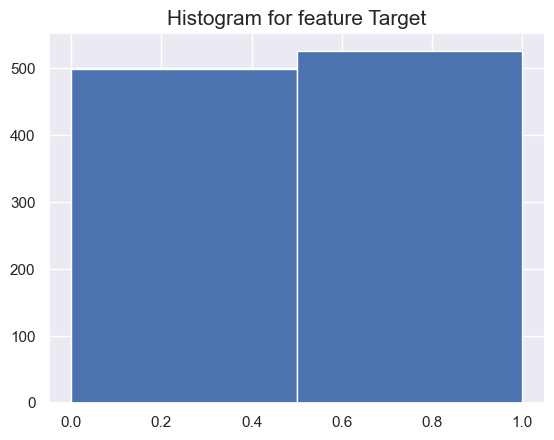

In [31]:
plt.hist(df["target"],bins=2)
plt.title('Histogram for feature Target',fontsize=15)
plt.show()

### 5. ACO Feature Selection and Model Building
Applying Gaussian Naive Bayes Model and calculating Accuracy.

In [32]:
data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = GaussianNB()
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Gaussian Naive Bayes: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Gaussian Naive Bayes: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Gaussian Naive Bayes: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Gaussian Naive Bayes: ', f1)

Accuracy for Gaussian Naive Bayes:  71.70731707317073
Precision value for Gaussian Naive Bayes:  0.6666666666666666
Recall value for Gaussian Naive Bayes:  0.8737864077669902
F1 score for Gaussian Naive Bayes:  0.7563025210084033


Applying Gaussian Naive Bayes Model with ACO and calculating Accuracy.

In [34]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, target):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, target,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = GaussianNB()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Gaussian Naive Bayes: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Gaussian Naive Bayes: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Gaussian Naive Bayes: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Gaussian Naive Bayes: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(v1_abs, v2_abs))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 13

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=50,evaporation=0.2, num_FS=6)

aco2.print()

aco2.run(data_bank = data, target = label)

Dataset Information(Samples, Attributes): (1025, 14)


ValueError: Input vector should be 1-D.

Applying Support Vector Machine Model and calculating Accuracy.

In [33]:
data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = svm.LinearSVC()
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Support Vector Machine: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Support Vector Machine: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Support Vector Machine: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Support Vector Machine: ', f1)


Accuracy for Support Vector Machine:  78.68852459016394
Precision value for Support Vector Machine:  0.7878787878787878
Recall value for Support Vector Machine:  0.8125
F1 score for Support Vector Machine:  0.8


Applying Support Vector Machine Model with ACO and calculating Accuracy.

In [35]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, target):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, target,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = svm.LinearSVC()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test, y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Support Vector Machine: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Support Vector Machine: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Support Vector Machine: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Support Vector Machine: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(v1_abs, v2_abs))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 13

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=50,evaporation=0.2, num_FS=7)

aco2.print()

aco2.run(data_bank = data, target = label)

Dataset Information(Samples, Attributes): (303, 14)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					13
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					50
Number of Attributes to be selected:			7
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 50 iterations:
 
Accuracy for Support Vector Machine:  85.24590163934425
Precision value for Support Vector Machine:  0.6382978723404256
Recall value for Support Vect

Applying AdaBoost Model and calculating Accuracy.

In [36]:
data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for AdaBoost: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for AdaBoost: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for AdaBoost: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for AdaBoost: ', f1)


Accuracy for AdaBoost:  81.9672131147541
Precision value for AdaBoost:  0.8888888888888888
Recall value for AdaBoost:  0.75
F1 score for AdaBoost:  0.8135593220338982


Applying AdaBoost Model with ACO and calculating Accuracy.

In [37]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, target):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, target,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = AdaBoostClassifier(n_estimators=10)
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test, y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for AdaBoost: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for AdaBoost: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for AdaBoost: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for AdaBoost: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(v1_abs, v2_abs))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 13

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=50,evaporation=0.2, num_FS=7)

aco2.print()

aco2.run(data_bank = data, target = label)

Dataset Information(Samples, Attributes): (303, 14)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					13
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					50
Number of Attributes to be selected:			7
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 50 iterations:
2 -> 3 -> 7 -> 4 -> 0 -> 12 -> 10 
Accuracy for AdaBoost:  88.52459016393442
Precision value for AdaBoost:  0.8214285714285714
Recall value for AdaBoos

Applying Bagging Model and calculating Accuracy.

In [39]:
data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = BaggingClassifier()
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Bagging: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Bagging: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Bagging: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Bagging: ', f1)


Accuracy for Bagging:  81.9672131147541
Precision value for Bagging:  0.8620689655172413
Recall value for Bagging:  0.78125
F1 score for Bagging:  0.8196721311475409


Applying Bagging Model with ACO and calculating Accuracy.

In [48]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, target):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, target,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = BaggingClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Bagging: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Bagging: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Bagging: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Bagging: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(v1_abs, v2_abs))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 13

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=20,evaporation=0.2, num_FS=9)

aco2.print()

aco2.run(data_bank = data, target = label)

Dataset Information(Samples, Attributes): (303, 14)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					13
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					20
Number of Attributes to be selected:			9
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 20 iterations:
2 -> 3 -> 7 -> 4 -> 0 -> 12 -> 10 -> 6 -> 1 
Accuracy for Bagging:  95.08196721311475
Precision value for Bagging:  0.9523809523809523
Recall value for

Applying Random Forest Model and calculating Accuracy.

In [49]:
data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Random Forest: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Random Forest: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Random Forest: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Random Forest: ', f1)


Accuracy for Random Forest:  83.60655737704919
Precision value for Random Forest:  0.9230769230769231
Recall value for Random Forest:  0.75
F1 score for Random Forest:  0.8275862068965517


Applying Random Forest Model with ACO and calculating Accuracy.

In [57]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, target):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, target,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = RandomForestClassifier(n_estimators=10)
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Random Forest: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Random Forest: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Random Forest: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Random Forest: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(v1_abs, v2_abs))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 13

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=20,evaporation=0.2, num_FS=10)

aco2.print()

aco2.run(data_bank = data, target = label)

Dataset Information(Samples, Attributes): (303, 14)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					13
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					20
Number of Attributes to be selected:			10
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 20 iterations:
0 -> 3 -> 4 -> 7 -> 12 -> 10 -> 1 -> 6 -> 2 -> 9 
Accuracy for Random Forest:  91.80327868852459
Precision value for Random Forest:  0.84
Recall value

Applying Gradient Boosting Model and calculating Accuracy.

In [59]:
data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Gradient Boosting: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Gradient Boosting: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Gradient Boosting: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Gradient nBoosting: ', f1)


Accuracy for Gradient Boosting:  83.60655737704919
Precision value for Gradient Boosting:  0.84375
Recall value for Gradient Boosting:  0.84375
F1 score for Gradient nBoosting:  0.84375


Applying Gradient Boosting Model with ACO and calculating Accuracy.

In [60]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, target):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, target,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = GradientBoostingClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Gradient Boosting: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Gradient Boosting: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Gradient Boosting: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Gradient nBoosting: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(v1_abs, v2_abs))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 13

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=20,evaporation=0.2, num_FS=11)

aco2.print()

aco2.run(data_bank = data, target = label)

Dataset Information(Samples, Attributes): (303, 14)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					13
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					20
Number of Attributes to be selected:			11
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 20 iterations:
0 -> 3 -> 4 -> 7 -> 12 -> 10 -> 1 -> 6 -> 2 -> 9 -> 8 
Accuracy for Gradient Boosting:  90.1639344262295
Precision value for Gradient Boosting:  0.827

Applying Extra Trees Model and calculating Accuracy.

In [67]:
data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = ExtraTreesClassifier()
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Extra Trees: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Extra Trees: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Extra Trees: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Extra Trees: ', f1)


Accuracy for Extra Trees:  90.1639344262295
Precision value for Extra Trees:  0.90625
Recall value for Extra Trees:  0.90625
F1 score for Extra Trees:  0.90625


Applying Extra Trees Model with ACO and calculating Accuracy.

In [68]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, target):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, target,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = ExtraTreesClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Extra Trees: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Extra Trees: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Extra Trees: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Extra Trees: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("heart project.csv")
data_columns = data.drop(['target'],axis=1)
label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(v1_abs, v2_abs))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 13

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=20,evaporation=0.2, num_FS=9)

aco2.print()

aco2.run(data_bank = data, target = label)

Dataset Information(Samples, Attributes): (303, 14)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					13
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					20
Number of Attributes to be selected:			9
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 20 iterations:
4 -> 3 -> 0 -> 7 -> 12 -> 10 -> 1 -> 6 -> 2 
Accuracy for Extra Trees:  91.80327868852459
Precision value for Extra Trees:  0.8387096774193549
Recall v

Comparison of Accuracy, Precision, Recall and F1 score for all the above models

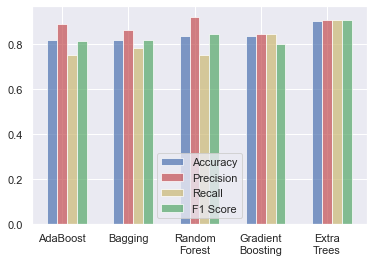

In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
n= 5
x = [0.8197 , 0.8197 , 0.8361 , 0.8361 , 0.9016 ]
y = [ 0.8888 , 0.8621 , 0.9231 , 0.8438 , 0.9062 ]
z = [ 0.75 , 0.7812 , 0.75 , 0.8438 , 0.9062 ]
w = [ 0.8135 , 0.8197 , 0.8438 , 0.80 , 0.9062 ]
index = np.arange(n)
bar_width = 0.15
opacity = 0.7

r1 = plt.bar(index, x, bar_width,
alpha=opacity, color='b', label='Accuracy')
 
r2 = plt.bar(index + bar_width,y, bar_width,
alpha=opacity, color='r', label='Precision')

r3 = plt.bar(index + (2*bar_width),z, bar_width,
alpha=opacity, color='y', label='Recall')

r4 = plt.bar(index + (3*bar_width),w, bar_width,
alpha=opacity, color='g', label='F1 Score')
plt.xticks(index + (bar_width),('AdaBoost','Bagging','Random\nForest','Gradient\nBoosting','Extra\nTrees'))

plt.legend()
plt.show()

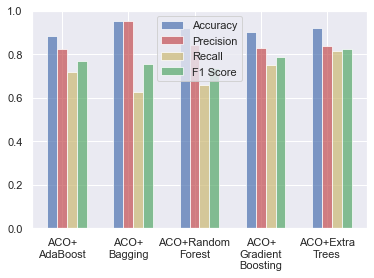

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
n= 5
x = [0.8852 , 0.9508 , 0.9180 , 0.9016 , 0.9180 ]
y = [ 0.8214 , 0.9524 , 0.84 , 0.8276 , 0.8387 ]
z = [ 0.7188 , 0.625 , 0.6562 , 0.75 , 0.8125 ]
w = [ 0.7667 , 0.7567 , 0.7368 , 0.7869 , 0.8254 ]
index = np.arange(n)
bar_width = 0.15
opacity = 0.7

r1 = plt.bar(index, x, bar_width,
alpha=opacity, color='b', label='Accuracy')
 
r2 = plt.bar(index + bar_width,y, bar_width,
alpha=opacity, color='r', label='Precision')

r3 = plt.bar(index + (2*bar_width),z, bar_width,
alpha=opacity, color='y', label='Recall')

r4 = plt.bar(index + (3*bar_width),w, bar_width,
alpha=opacity, color='g', label='F1 Score')
plt.xticks(index + (bar_width),('ACO+\nAdaBoost','ACO+\nBagging','ACO+Random\nForest','ACO+\nGradient\nBoosting' ,
                                'ACO+Extra\nTrees'))

plt.legend()
plt.show()